## Мы — начинающие предприниматели и хотим создать идеальный лимонад. Отзывы людей показали, что вкус лимонада зависит от трёх параметров. Наша задача найти такие х1, х2 и х3, чтобы предугадывать оценки пользователей с наибольшей точностью.

In [3]:
import pandas as pd
import numpy as np
from google.colab import files

In [1]:
uploaded = files.upload()

Saving lemonade_3d_dataset (1).csv to lemonade_3d_dataset (1).csv


In [4]:
df = pd.read_csv("lemonade_3d_dataset (1).csv")
df.head()

,lemon_juice_ml,sugar_g,fizziness,rating
0,38.73,31.14,2.83,6.80
1,67.54,28.71,4.59,8.27
2,56.60,20.80,0.99,5.87
3,49.93,27.19,4.47,8.14
4,27.80,21.43,2.03,5.22


In [5]:
X1 = df["lemon_juice_ml"].values
X2 = df["sugar_g"].values
X3 = df["fizziness"].values
Y = df["rating"].values
n = len(Y)

In [6]:
# 📌 3. Функция ошибки (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [7]:
# 📌 4. Градиентный спуск (функция обучения модели)
def gradient_descent(X1, X2, X3, Y, alpha=0.0001, epochs=1000):
    w1, w2, w3, b = 0.0, 0.0, 0.0, 0.0
    n = len(Y)
    history = []

    for epoch in range(epochs):
        y_pred = w1 * X1 + w2 * X2 + w3 * X3 + b
        error = y_pred - Y

        # Градиенты
        dw1 = (2/n) * np.dot(error, X1)
        dw2 = (2/n) * np.dot(error, X2)
        dw3 = (2/n) * np.dot(error, X3)
        db = (2/n) * np.sum(error)

        # Обновление параметров
        w1 -= alpha * dw1
        w2 -= alpha * dw2
        w3 -= alpha * dw3
        b  -= alpha * db

        # Сохраняем ошибку
        if epoch % 50 == 0:
            loss = mse(Y, y_pred)
            history.append(loss)

    return w1, w2, w3, b, history

In [8]:
w1, w2, w3, b = 0.0, 0.0, 0.0, 0.0
alpha = 0.0001
epochs = 1000

In [9]:
# 📌 5. Обучение модели
w1, w2, w3, b, history = gradient_descent(X1, X2, X3, Y, alpha=0.0001, epochs=1000)

print(f"📈 Финальные параметры:")
print(f"w1 (сок):       {w1:.4f}")
print(f"w2 (сахар):     {w2:.4f}")
print(f"w3 (газ):       {w3:.4f}")
print(f"b (свободный):  {b:.4f}")


📈 Финальные параметры:
w1 (сок):       0.0698
w2 (сахар):     0.0789
w3 (газ):       0.4650
b (свободный):  0.0448


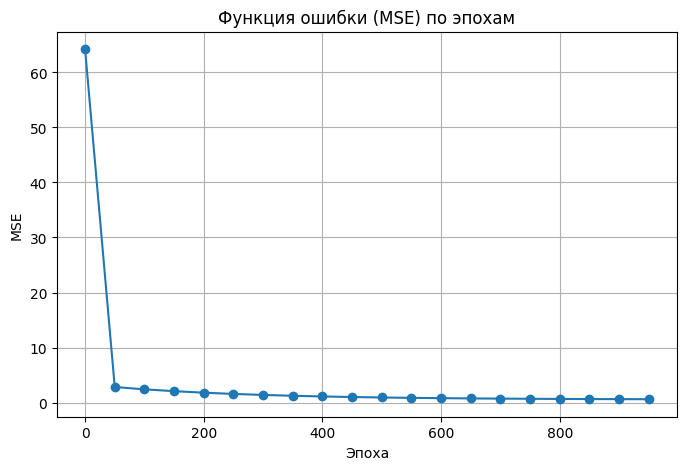

In [10]:
# 📌 6. График функции ошибки по эпохам
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(history)) * 50, history, marker='o')
plt.title("Функция ошибки (MSE) по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

In [25]:
def cross_val_epochs(X1, X2, X3, Y, epochs_list, alpha=0.0001, k=5):
    from sklearn.model_selection import KFold

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    results = []

    for ep in epochs_list:
        fold_mse_list = []

        for train_idx, val_idx in kf.split(X1):
            # Разделение данных
            x1_train, x1_val = X1[train_idx], X1[val_idx]
            x2_train, x2_val = X2[train_idx], X2[val_idx]
            x3_train, x3_val = X3[train_idx], X3[val_idx]
            y_train, y_val = Y[train_idx], Y[val_idx]

            # Обучение
            w1, w2, w3, b, _ = gradient_descent(x1_train, x2_train, x3_train, y_train, alpha=alpha, epochs=ep)

            # Предсказание
            y_pred = w1 * x1_val + w2 * x2_val + w3 * x3_val + b
            fold_mse_list.append(mse(y_val, y_pred))

        avg = np.mean(fold_mse_list)
        results.append((ep, avg))

    return results

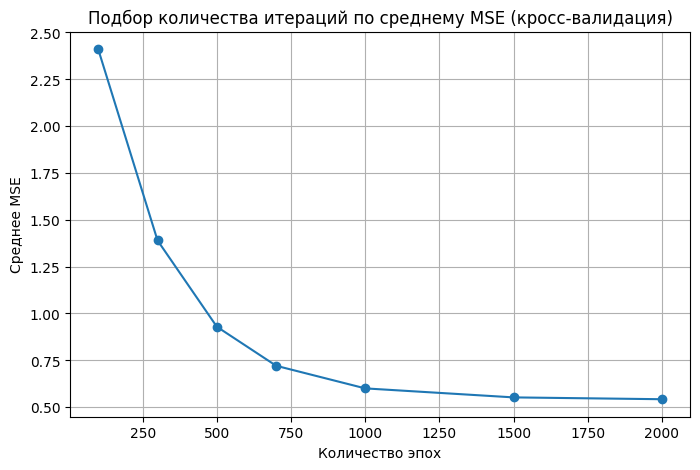

In [26]:
# Список эпох, которые проверим
epochs_range = [100, 300, 500, 700, 1000, 1500, 2000]

# Получение ошибок
epoch_results = cross_val_epochs(X1, X2, X3, Y, epochs_range)

# Отдельные списки для графика
epoch_vals = [r[0] for r in epoch_results]
mse_vals = [r[1] for r in epoch_results]

# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(epoch_vals, mse_vals, marker='o')
plt.title("Подбор количества итераций по среднему MSE (кросс-валидация)")
plt.xlabel("Количество эпох")
plt.ylabel("Среднее MSE")
plt.grid(True)
plt.show()

In [38]:
def predict(lemon_juice_ml, sugar_g, fizziness):
    return w1 * lemon_juice_ml + w2 * sugar_g + w3 * fizziness + b

example = {
    "lemon_juice_ml": 45,
    "sugar_g": 25,
    "fizziness": 6
}

pred = predict(**example)
print(f"🔮 Предсказание оценки вкуса при x1={example['lemon_juice_ml']}, x2={example['sugar_g']}, x3={example['fizziness']}: {pred:.2f} из 10")

🔮 Предсказание оценки вкуса при x1=45, x2=25, x3=6: 7.54 из 10


In [14]:
import matplotlib.pyplot as plt

# Отрисовка графика ошибок
def plot_cv_errors(mse_scores):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(mse_scores)+1), mse_scores, marker='o', linestyle='-')
    plt.title("Ошибки MSE на каждом фолде (кросс-валидация)")
    plt.xlabel("Фолд")
    plt.ylabel("MSE")
    plt.xticks(range(1, len(mse_scores)+1))
    plt.grid(True)
    plt.show()

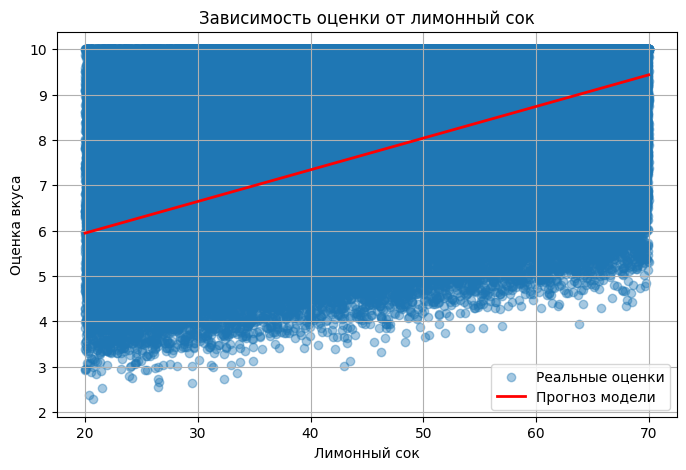

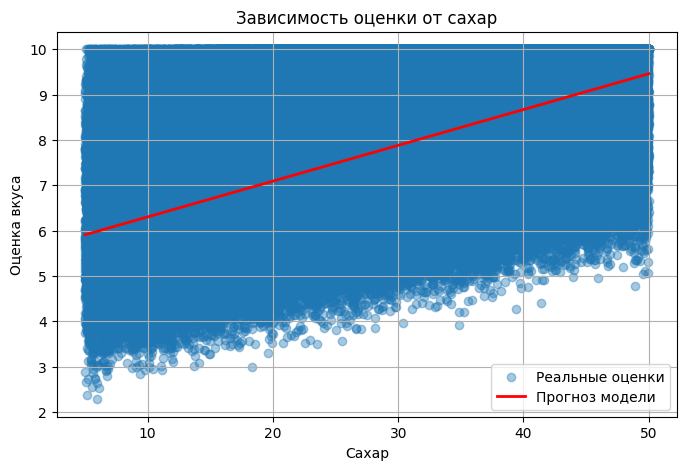

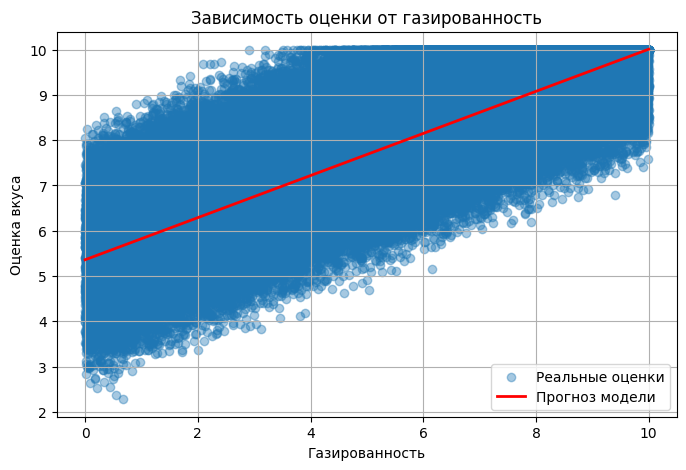

In [24]:
def plot_feature_vs_target(X, Y, w_target, label, fixed_values, w_all, b):
    # X — изменяемый признак, label — подпись оси
    # fixed_values: dict с фиксированными значениями других признаков
    # w_all: (w1, w2, w3)

    X_sorted = np.sort(X)
    # Построение линии модели с фиксированными значениями
    if label == "Лимонный сок":
        x1, x2, x3 = X_sorted, fixed_values['sugar'], fixed_values['fizz']
    elif label == "Сахар":
        x1, x2, x3 = fixed_values['lemon'], X_sorted, fixed_values['fizz']
    else:
        x1, x2, x3 = fixed_values['lemon'], fixed_values['sugar'], X_sorted

    Y_pred = w_all[0] * x1 + w_all[1] * x2 + w_all[2] * x3 + b

    # График
    plt.figure(figsize=(8, 5))
    plt.scatter(X, Y, alpha=0.4, label="Реальные оценки")
    plt.plot(X_sorted, Y_pred, color="red", linewidth=2, label="Прогноз модели")
    plt.xlabel(f"{label}")
    plt.ylabel("Оценка вкуса")
    plt.title(f"Зависимость оценки от {label.lower()}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Средние значения других признаков
fixed = {
    'lemon': np.mean(X1),
    'sugar': np.mean(X2),
    'fizz': np.mean(X3)
}

# Графики
plot_feature_vs_target(X1, Y, w1, "Лимонный сок", fixed, (w1, w2, w3), b)
plot_feature_vs_target(X2, Y, w2, "Сахар", fixed, (w1, w2, w3), b)
plot_feature_vs_target(X3, Y, w3, "Газированность", fixed, (w1, w2, w3), b)


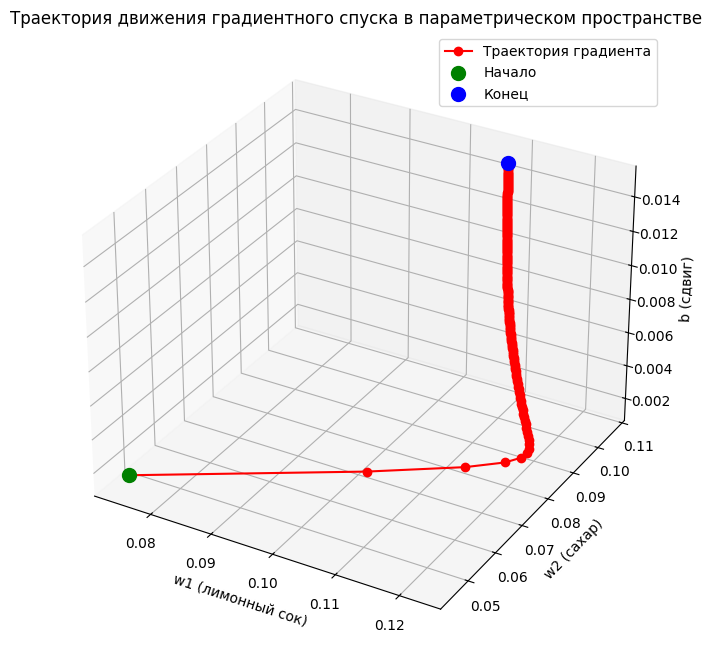

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Пример данных (замени на свои данные из лимонада)
np.random.seed(42)
n_samples = 500
X1 = np.random.uniform(20, 70, n_samples)
X2 = np.random.uniform(5, 50, n_samples)
X3 = np.random.uniform(0, 10, n_samples)
true_w1, true_w2, true_w3, true_b = 0.04, 0.06, 0.5, 2.0
Y = true_w1 * X1 + true_w2 * X2 + true_w3 * X3 + true_b + np.random.normal(0, 0.4, n_samples)

# Инициализация параметров
w1, w2, w3, b = 0.0, 0.0, 0.0, 0.0
alpha = 0.0001
epochs = 200
trajectory = []

for epoch in range(epochs):
    y_pred = w1 * X1 + w2 * X2 + w3 * X3 + b
    error = y_pred - Y

    dw1 = 2 * np.mean(error * X1)
    dw2 = 2 * np.mean(error * X2)
    db = 2 * np.mean(error)

    w1 -= alpha * dw1
    w2 -= alpha * dw2
    b -= alpha * db

    trajectory.append((w1, w2, b))

trajectory = np.array(trajectory)

# Визуализация траектории в 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Рисуем траекторию движения градиентного спуска
ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2], 'o-', color='red', label='Траектория градиента')

# Начальная и конечная точки
ax.scatter(trajectory[0,0], trajectory[0,1], trajectory[0,2], color='green', s=100, label='Начало')
ax.scatter(trajectory[-1,0], trajectory[-1,1], trajectory[-1,2], color='blue', s=100, label='Конец')

ax.set_xlabel('w1 (лимонный сок)')
ax.set_ylabel('w2 (сахар)')
ax.set_zlabel('b (сдвиг)')
ax.set_title('Траектория движения градиентного спуска в параметрическом пространстве')
ax.legend()
plt.show()
